In [21]:
# import the custom GDrive downloader library:
from URL_download_2 import gdown

# provide file ID:
file_id = '1YPr_K8xSuKghONozyjnVThe47EsiDEZj'

# instantiate class (create a class instance):
G = gdown()

# Download data from Google Drive as necessary:
G.download_file(file_id)

Name: Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=2, TOPO, .mat
Download Progress: 14
Download Progress: 28
Download Progress: 42
Download Progress: 57
Download Progress: 71
Download Progress: 85
Download Progress: 100
Download Complete


In [15]:
file = 'Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=2, TOPO, .mat' #0.77
# file = 'Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=1, win=2, TOPO, .mat' #0.77
# file = 'Merged456-197-289_ICA(-eyes)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=2, win=2, TOPO, small.mat'
# file = 'Merged123-143-202_ICA(-Eyes)+AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=1, win=2, TOPO, .mat' #0.56
# file = 'Merged123_75_134_ICA(-eyes)AUDpreproc.mat, DS2=64Hz, FIR=1-30Hz, centnorm=1, step=1, win=2, TOPO, .mat'
SHUFFLE = False
BATCH_SIZE = 20
TEST_TRAIN = 0.2
DS_FREQ = 1
n_bins = 4

In [16]:
# get the Dataset:
import scipy.io as sio
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

def downsample_frequency_domain(n_bins):
    print('Downsampling the frequency domain from', X.shape[3],'to', n_bins)
    xx = np.zeros([X.shape[0],X.shape[1],X.shape[2],n_bins])
    print(xx.shape)
    a = np.round(np.linspace(0,X.shape[3],n_bins+1))
    a = a.astype('uint8')
    print(a)
    for i in range(n_bins):
        xx[:,:,:,i] = np.mean(X[:,:,:,a[i]:a[i+1]], axis=3)   
        print(i)
    print(xx.shape)
    return xx

def parse_array(in_array):
    new_array = []
    for i in range(len(in_array)):
        if str(in_array[i]).find("left")>0:
            new_array.append("left")
        if str(in_array[i]).find("right")>0:
            new_array.append("right")
        if (str(in_array[i]).find("left")<0 and 
            str(in_array[i]).find("right")<0):
            print(i)
            new_array.append("unknown")
    return new_array

def find_right(Q, label):
    idx = []
    for i in range(len(Q)):
        if Q[i] == label:
            idx.append(i)
    return(idx)

path = '/home/amplifier/home/DATASETS/' + file
mat_contents = sio.loadmat(path)
X = mat_contents['X']
Y = mat_contents['Z']
# Z = mat_contents['Z']
Q = parse_array(mat_contents['Q'])

print(X.shape)
print(Y.shape)
print(len(Q))

(450, 67, 67, 65)
(450, 1)
450


In [17]:
if DS_FREQ == 1:
    X = downsample_frequency_domain(n_bins)

if X.shape[1]<X.shape[2]:
    X = np.transpose(X,[0,2,1])

if Y.shape[1] > Y.shape[0]:
    Y = Y.T
    
print('Original data shape:', X.shape)
print('Original labels shape:', Y.shape)

# verify that the model REALLY finds a mapping between the input and the labels. If we get
# our accuracy by chance, then we should get the same accuracy on a permuted dataset:
# Y = np.random.permutation(Y)


# winsize = mat_contents['winsize']
# stepsize = mat_contents['stepsize']
# trial_len = mat_contents['trial_len']
# low_cutoff = mat_contents['low_cutoff']
# high_cutoff = mat_contents['high_cutoff']
# source = mat_contents['filein']

x_train, x_test, y_train, y_test, q_train, q_test = train_test_split(X, Y, Q, test_size=TEST_TRAIN, shuffle=SHUFFLE)
print('Original data type:', x_train.dtype)
print('Original data type:', x_train.dtype)

# convert to float64 for numerical stability:
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')
print('y_test.shape before', y_test.shape)

# one hot encode the labels:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train)
y_test = onehot_encoder.fit_transform(y_test)
print('y_test.shape after', y_test.shape)

# convert to float16 to save space:
x_train = x_train.astype('float16')
y_train = y_train.astype('float16')
x_test = x_test.astype('float16')
y_test = y_test.astype('float16')
print('Normalized data type:', x_train.dtype)

leng = X.shape[1] # if you work in the FD, this is the height of the sample time-frequency image, othewise EEG channels
chan = X.shape[2] # if you work in the FD, this is the width of the sample time-frequency image, othewise time samples of EEG signal

if len(X.shape)==3:
    streams = 1 # this is EEG channels if you work with frequency domain, in the TD streams = 1
if len(X.shape)==4:
    streams = X.shape[3] # this is EEG channels if you work with frequency domain, in the TD streams = 1


print('test input shape', x_test.shape, "Nomralized MEAN:", np.mean(x_test), "min", np.min(x_test),"max", np.max(x_test))
print('train input shape', x_train.shape, "Nomralized MEAN:", np.mean(x_train), "min", np.min(x_train),"max", np.max(x_train))

print('test labels shape', y_test.shape, "Nomralized MEAN:", np.mean(y_test), "min", np.min(y_test),"max", np.max(y_test))
print('train labels shape', y_train.shape, "Nomralized MEAN:", np.mean(y_train), "min", np.min(y_train),"max", np.max(y_train))

# print('Window length', winsize)
# print('Step size:', stepsize)
# print('Trial length:', trial_len)

Downsampling the frequency domain from 65 to 4
(450, 67, 67, 4)
[ 0 16 32 49 65]
0
1
2
3
(450, 67, 67, 4)
Original data shape: (450, 67, 67, 4)
Original labels shape: (450, 1)
Original data type: float64
Original data type: float64
y_test.shape before (90, 1)
y_test.shape after (90, 2)
Normalized data type: float16
test input shape (90, 67, 67, 4) Nomralized MEAN: 0.093018 min 0.0 max 0.74805
train input shape (360, 67, 67, 4) Nomralized MEAN: 0.093384 min -0.036926 max 1.5732
test labels shape (90, 2) Nomralized MEAN: 0.5 min 0.0 max 1.0
train labels shape (360, 2) Nomralized MEAN: 0.5 min 0.0 max 1.0


In [18]:
# make sure you don't hog all the video memory
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
from keras import backend as K
K.set_session(sess)
###################################

def activation():
    return ELU(alpha=1.0) # Activation('relu') #

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, ELU
from keras.models import Model
from keras.callbacks import TensorBoard, EarlyStopping

sh = x_train.shape


input_img = Input(shape=(sh[1], sh[2], sh[3]))  # adapt this if using `channels_first` image data format

x = Conv2D(40, (3, 3), activation='relu', padding='same')(input_img)
# x = MaxPooling2D((2, 2), padding='same')(x)
x = BatchNormalization()(x)
# x = Dropout(0.2)(x)
x = Conv2D(40, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = BatchNormalization()(x)
# x = Dropout(0.3)(x)
x = Conv2D(80, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(80, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
# x = Dropout(0.5)(x)
x = Conv2D(160, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Flatten()(x)
x = Dropout(0.8)(x)
x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(2, activation='softmax')(x)

model = Model(input_img, x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 67, 67, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 40)        1480      
_________________________________________________________________
batch_normalization_1 (Batch (None, 67, 67, 40)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 67, 67, 40)        14440     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 40)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 34, 34, 40)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 80)        28880     
__________

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=50, mode='min')
checkpointer = ModelCheckpoint(filepath='/home/amplifier/home/NEW_DL/weights/IMG_weights_TD_1D.h5',
                               verbose=1,
                               monitor='val_acc',
                               save_best_only=True)

train_history = model.fit(x_train, y_train,
                epochs=100,
                batch_size=BATCH_SIZE,
                verbose=2,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[checkpointer, early_stopping])

Train on 360 samples, validate on 90 samples
Epoch 1/100
 - 3s - loss: 1.0360 - acc: 0.4972 - val_loss: 2.6648 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to /home/amplifier/home/NEW_DL/weights/IMG_weights_TD_1D.h5
Epoch 2/100
 - 0s - loss: 0.9415 - acc: 0.5000 - val_loss: 1.1147 - val_acc: 0.5333

Epoch 00002: val_acc improved from 0.50000 to 0.53333, saving model to /home/amplifier/home/NEW_DL/weights/IMG_weights_TD_1D.h5
Epoch 3/100
 - 0s - loss: 0.7982 - acc: 0.5444 - val_loss: 0.5866 - val_acc: 0.6444

Epoch 00003: val_acc improved from 0.53333 to 0.64444, saving model to /home/amplifier/home/NEW_DL/weights/IMG_weights_TD_1D.h5
Epoch 4/100
 - 0s - loss: 0.7511 - acc: 0.6028 - val_loss: 0.6066 - val_acc: 0.6556

Epoch 00004: val_acc improved from 0.64444 to 0.65556, saving model to /home/amplifier/home/NEW_DL/weights/IMG_weights_TD_1D.h5
Epoch 5/100
 - 0s - loss: 0.7178 - acc: 0.6083 - val_loss: 0.5462 - val_acc: 0.7778

Epoch 00005: val_acc 

 - 0s - loss: 0.3409 - acc: 0.8667 - val_loss: 0.6790 - val_acc: 0.7889

Epoch 00060: val_acc did not improve
Epoch 61/100
 - 0s - loss: 0.2902 - acc: 0.8778 - val_loss: 0.6685 - val_acc: 0.7000

Epoch 00061: val_acc did not improve
Epoch 62/100
 - 0s - loss: 0.3682 - acc: 0.8500 - val_loss: 0.8626 - val_acc: 0.7778

Epoch 00062: val_acc did not improve
Epoch 63/100
 - 0s - loss: 0.2754 - acc: 0.8917 - val_loss: 0.6941 - val_acc: 0.7333

Epoch 00063: val_acc did not improve
Epoch 64/100
 - 0s - loss: 0.2390 - acc: 0.9000 - val_loss: 0.6808 - val_acc: 0.7000

Epoch 00064: val_acc did not improve
Epoch 65/100
 - 0s - loss: 0.2300 - acc: 0.9167 - val_loss: 0.5950 - val_acc: 0.8000

Epoch 00065: val_acc did not improve
Epoch 66/100
 - 0s - loss: 0.2308 - acc: 0.9333 - val_loss: 0.5221 - val_acc: 0.7778

Epoch 00066: val_acc did not improve
Epoch 67/100
 - 0s - loss: 0.2364 - acc: 0.9000 - val_loss: 0.7331 - val_acc: 0.8222

Epoch 00067: val_acc did not improve
Epoch 68/100
 - 0s - loss: 0.

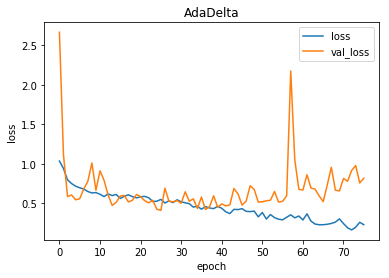

In [20]:
# print(np.array(history.losses))
import matplotlib.pyplot as plt
%matplotlib inline
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.title('AdaDelta')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [21]:
model.load_weights('/home/amplifier/home/NEW_DL/weights/IMG_weights_TD_1D.h5')
# let's predict a TRAINING sammple:
decoded_train = model.predict(x_train)
decoded_test = model.predict(x_test)
print(decoded_train.shape)
print(decoded_test.shape)

# now test sample by sample
cor_test = []
L = x_test.shape
for sample_no in range(x_test.shape[0]):
    pred = model.predict(np.expand_dims(x_test[sample_no],0))
    if ((pred[0][0]<pred[0][1]) and (y_test[sample_no,0] < y_test[sample_no,1]) or
       ((pred[0][0]>pred[0][1]) and (y_test[sample_no,0] > y_test[sample_no,1]))):
        cor_test.append(1)
    else:
        cor_test.append(0)

cor_train = []
L = x_train.shape
for sample_no in range(x_train.shape[0]):
    pred = model.predict(np.expand_dims(x_train[sample_no],0))
    if ((pred[0][0]<pred[0][1]) and (y_train[sample_no,0] < y_train[sample_no,1]) or
       ((pred[0][0]>pred[0][1]) and (y_train[sample_no,0] > y_train[sample_no,1]))):
        cor_train.append(1)
    else:
        cor_train.append(0)

# Report accuracies
print('Accuracy on the test data:', np.mean(cor_test))
print('Accuracy on the training data:', np.mean(cor_train))

(360, 2)
(90, 2)
Accuracy on the test data: 0.844444444444
Accuracy on the training data: 0.733333333333


Sample: 0 Prediction: [[ 0.50938272  0.49061728]] Ground Truth [ 0.  1.] right
Sample: 1 Prediction: [[ 0.49962109  0.50037891]] Ground Truth [ 0.  1.] right
Sample: 2 Prediction: [[ 0.43155926  0.56844074]] Ground Truth [ 0.  1.] right
Sample: 3 Prediction: [[ 0.48422608  0.51577395]] Ground Truth [ 0.  1.] right
Sample: 4 Prediction: [[ 0.43632904  0.56367093]] Ground Truth [ 0.  1.] right
Sample: 5 Prediction: [[ 0.37916195  0.62083805]] Ground Truth [ 0.  1.] right
Sample: 6 Prediction: [[ 0.44813746  0.55186248]] Ground Truth [ 0.  1.] right
Sample: 7 Prediction: [[ 0.47883537  0.52116466]] Ground Truth [ 0.  1.] right
Sample: 8 Prediction: [[ 0.46625942  0.53374058]] Ground Truth [ 0.  1.] right
Sample: 9 Prediction: [[ 0.53044748  0.46955255]] Ground Truth [ 0.  1.] right
Sample: 10 Prediction: [[ 0.46571931  0.53428072]] Ground Truth [ 0.  1.] right
Sample: 11 Prediction: [[ 0.439127    0.56087303]] Ground Truth [ 0.  1.] right
Sample: 12 Prediction: [[ 0.36003366  0.63996631]]

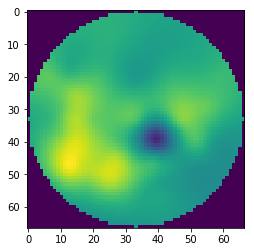

In [87]:
for sample_no in range(70):
    pred = model.predict(np.expand_dims(x_test[sample_no],0))
    print('Sample:', sample_no, 'Prediction:', pred, 'Ground Truth', y_test[sample_no], q_test[sample_no])
sample_no = 2

plt.imshow(x_test[sample_no,:,:,2].astype('float64'))

Text(0.5,0.98,'Topographies ')

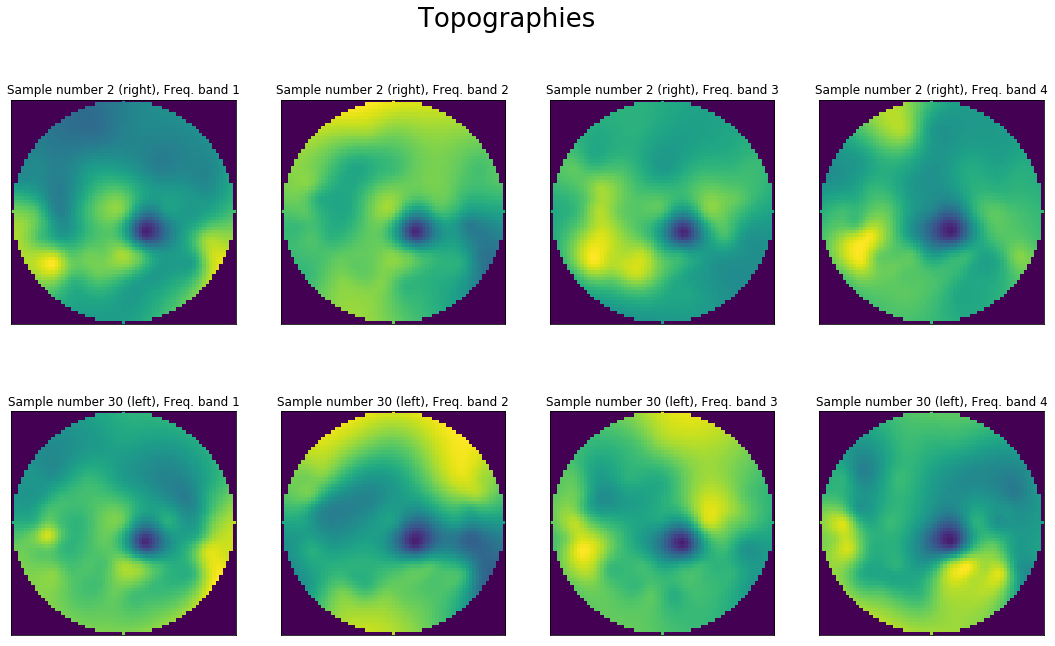

In [88]:
sample_nos = [2, 30]
I = 2
J = x_test.shape[3]
c = 0
fig, axs = plt.subplots(I,J)
fig.set_size_inches(18.5, 10.5)
axs = axs.ravel()
for i in range(I):
    for j in range(J):
        axs[c].imshow(x_test[sample_nos[i],:,:,j].astype('float64'))
        axs[c].get_xaxis().set_visible(False)
        axs[c].get_yaxis().set_visible(False)        
        axs[c].set_title('Sample number ' + str(sample_nos[i]) + ' (' + q_test[sample_nos[i]] + '), Freq. band ' + str(j+1))
        c = c + 1
plt.suptitle('Topographies ', fontsize=26)

Text(0.5,0.98,'Topographies Averaged within Classes ')

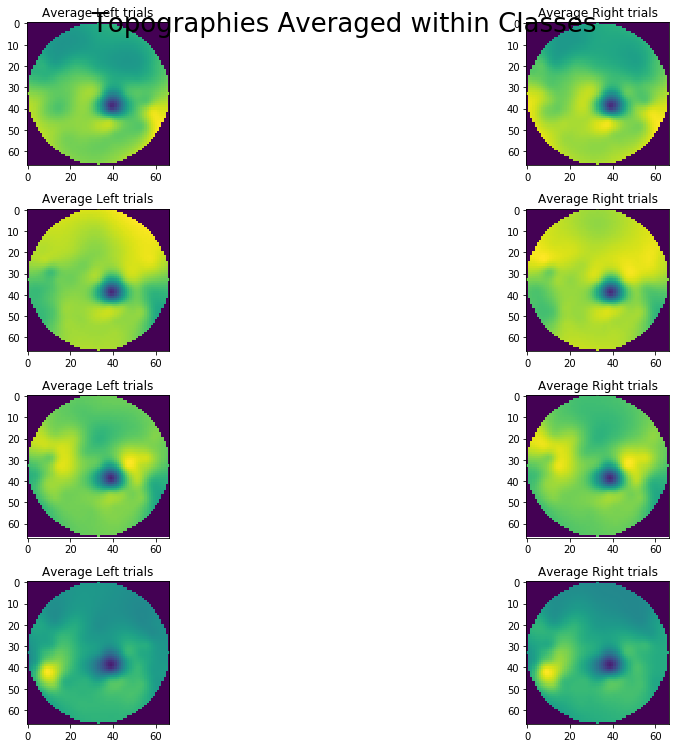

In [89]:

avg_right = np.zeros([67,67, x_test.shape[3]])
avg_left = np.zeros([67,67, x_test.shape[3]])

for b in range(x_test.shape[3]):
    avg_right[:,:,b] = np.mean(x_test[np.array(find_right(q_test, label='right')),:,:,b],axis=0)
    avg_left[:,:,b] = np.mean(x_test[np.array(find_right(q_test, label='left')),:,:,b],axis=0)

I = x_test.shape[3]
J = 2

fig, axs = plt.subplots(I,J)
fig.set_size_inches(18.5, 10.5)
axs = axs.ravel()

c = 0
for b in range(x_test.shape[3]):
    axs[c].imshow(avg_left[:,:,b].astype('float64'))
    axs[c].set_title('Average Left trials')
    c = c + 1
    axs[c].imshow(avg_right[:,:,b].astype('float64'))
    axs[c].set_title('Average Right trials')
    c = c + 1
#         axs[c].get_xaxis().set_visible(False)
#         axs[c].get_yaxis().set_visible(False)        
#         axs[c].set_title('Sample number ' + str(sample_nos[i]) + ' (' + q_test[sample_nos[i]] + '), Freq. band ' + str(j+1))
plt.tight_layout()
plt.suptitle('Topographies Averaged within Classes ', fontsize=26)